# Exercise: Clustering Algorithms with Scikit Learn

<img src="../IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

Hello students! The following is the initial task in the UDL Module. This task pertains to clustering algorithms and rewards 1 bonus point upon fulfillment.

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

In [3]:
# converted to dataframe 

import pandas as pd
df_1 = pd.DataFrame(A, columns = ['c1', 'c2'])
df_2 = pd.DataFrame(B, columns = ['c1', 'c2'])
df_3 = pd.DataFrame(C, columns = ['c1', 'c2'])
df_4 = pd.DataFrame(D, columns = ['c1', 'c2'])
df_5 = pd.DataFrame(E, columns = ['c1', 'c2'])
df_6 = pd.DataFrame(F, columns = ['c1', 'c2'])


In [4]:
# scaling the features of the dataset

scaler = StandardScaler()
for i in [df_1, df_2, df_3, df_4, df_5, df_6]:
  i[['ct1', 'ct2']] = scaler.fit_transform(i[['c1', 'c2']])


## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

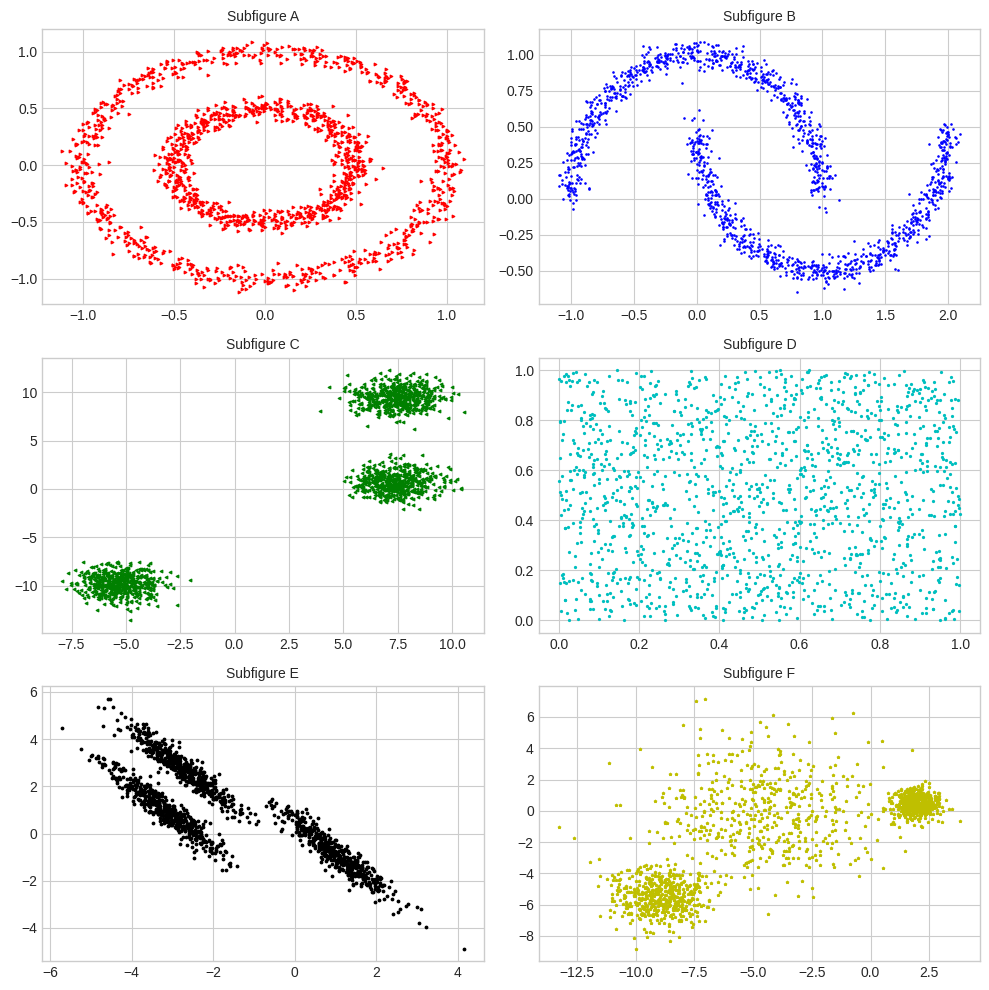

In [5]:
# Data visualization

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style

style.use('seaborn-v0_8-whitegrid')                             # use specific style
fig, axs = plt.subplots(3,2 , figsize=(10,10))                  # plot 6 figures in 2 rows 3 cloumns
axs[0 ,0].scatter(A[:,0],A[:,1], s=3, c='r', marker=">")        # ploted scatter plot of dataset A
axs[0,0].set_title('Subfigure A', fontsize = 10)
axs[0 ,1].scatter(B[:,0],B[:,1], s=3, c='b', marker=".")        # ploted scatter plot of dataset B
axs[0,1].set_title('Subfigure B', fontsize = 10)
axs[1 ,0].scatter(C[:,0],C[:,1], s=3, c='g', marker="<")        # ploted scatter plot of dataset C
axs[1,0].set_title('Subfigure C', fontsize = 10)
axs[1 ,1].scatter(D[:,0],D[:,1],s=7, c='c', marker=".")         # ploted scatter plot of dataset D
axs[1,1].set_title('Subfigure D', fontsize = 10)
axs[2 ,0].scatter(E[:,0],E[:,1],s=3, c='k', marker="o")         # ploted scatter plot of dataset E
axs[2,0].set_title('Subfigure E', fontsize = 10)
axs[2 ,1].scatter(F[:,0],F[:,1], s=3, c='y', marker="*")        # ploted scatter plot of dataset F
axs[2,1].set_title('Subfigure F', fontsize = 10)
fig.tight_layout()

# ***Visualization of the datapoints in every dataset***

---

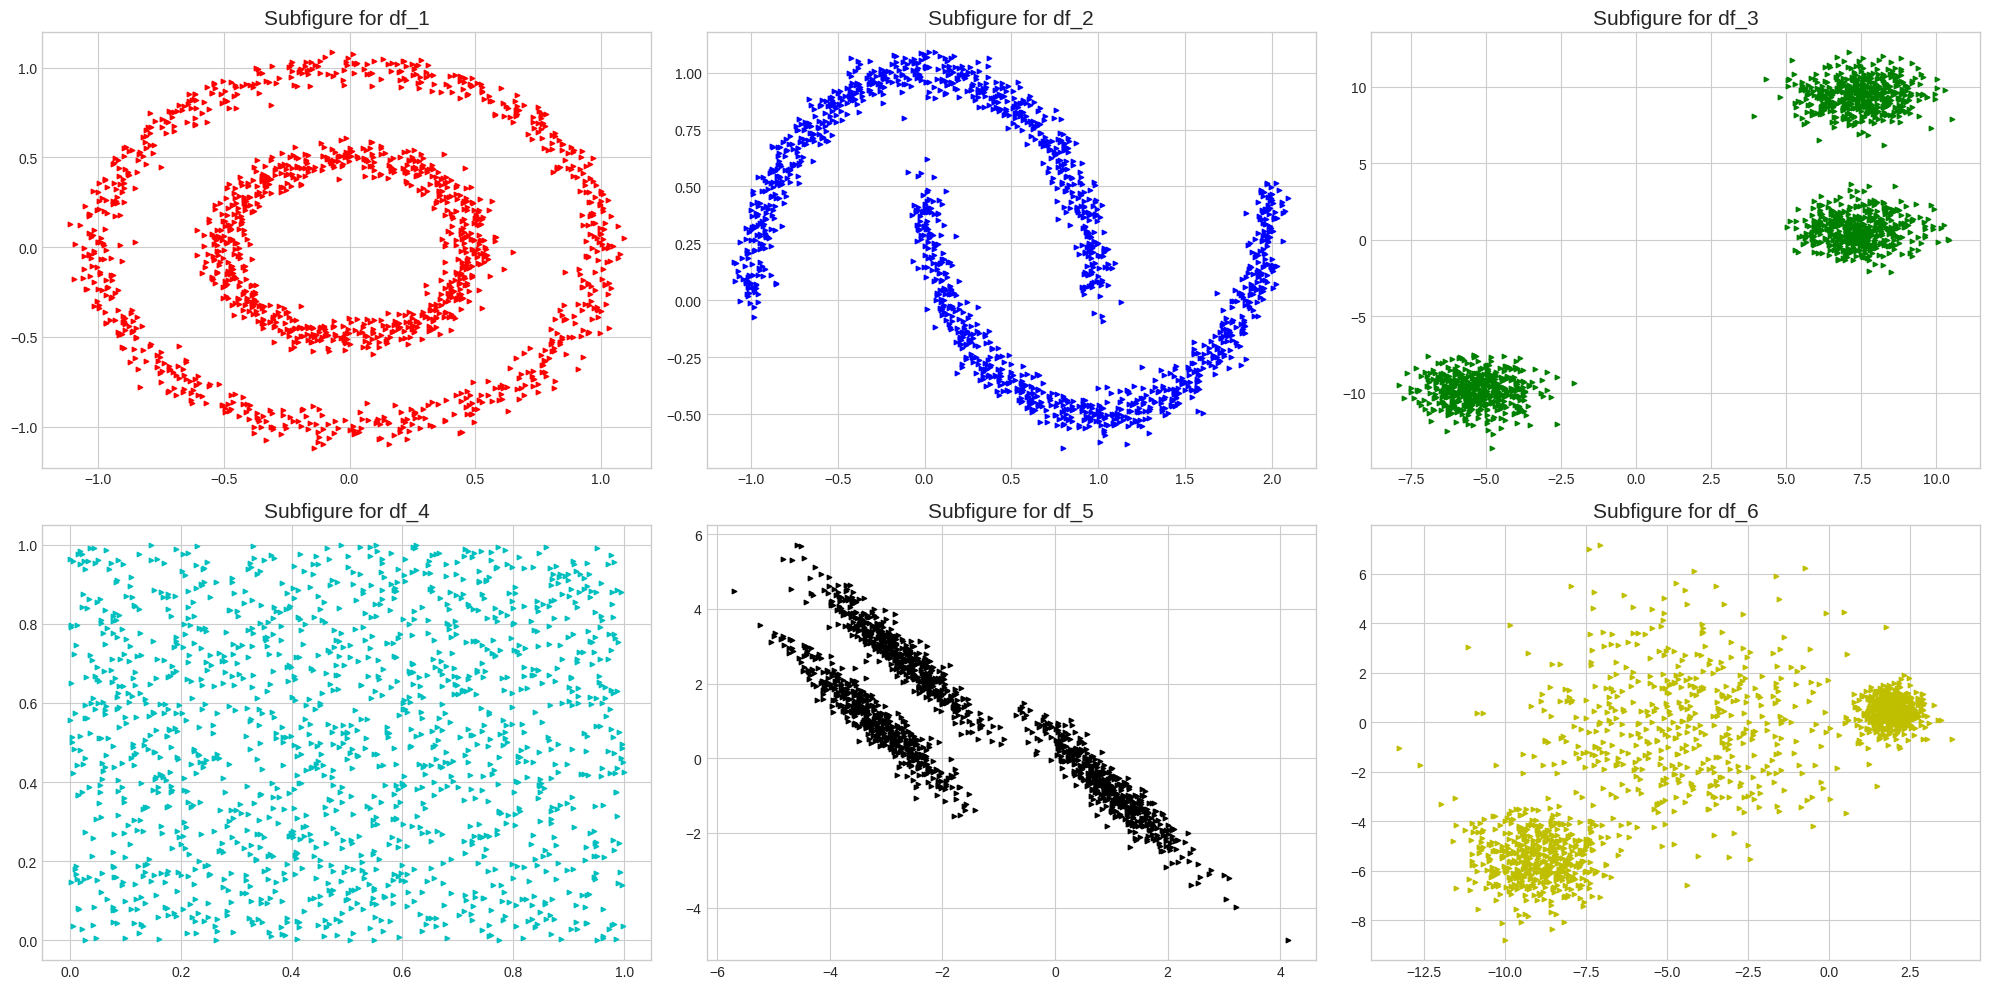

In [6]:
# data visualization

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize =(20,10))
style.use('seaborn-v0_8-whitegrid')
color = ['r', 'b', 'g' ,'c', 'k', 'y']           # colors list
for i, ax in enumerate(fig.axes, start=1):
    df = globals()[f'df_{i}']                    # iterate over data frames
    ax.scatter(df['c1'],df['c2'], s=10, c=color[i-1], marker=">")   #plot scatter plot for every datasets
    ax.set_title(f'Subfigure for df_{i}', fontsize = 15)
fig.tight_layout()


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 Plot all results
* 2.2 Manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 
* 2.4 Learn the optimal value of $k$ using the elbow method 

# ***2.1 First plotted results of clustering by selecting the value of k manually.***

---


I have created the perform_clustering() function to find clusters, labels and drawing the result.

In [7]:
def perform_clustering(data, k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, random_state=random_state)    # model created 
    kmeans.fit(data[['ct1','ct2']])

    data['labels'] = kmeans.labels_       # labels stored in dataframe
    centroids = kmeans.cluster_centers_   # centroids stored in list
    style.use('default')
    plt.scatter(x=data['c1'], y=data['c2'], c=data['labels'], s = 6, marker = '*')
    plt.scatter(centroids[:,0], centroids[:,1], marker='X', s= 50, linewidths=0.5, color='r')
    plt.title('Clustering by KMeans')
    for i in range(0,k):
        plt.text(centroids[i,0], centroids[i,1], f'Cluster {i+1}', fontsize=10, fontstyle ='oblique')
    plt.show()

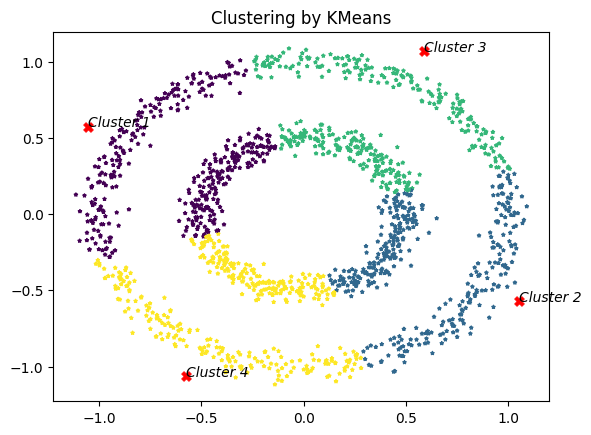

In [8]:
perform_clustering(df_1, 4)      # KMeans clustering result for dataset A

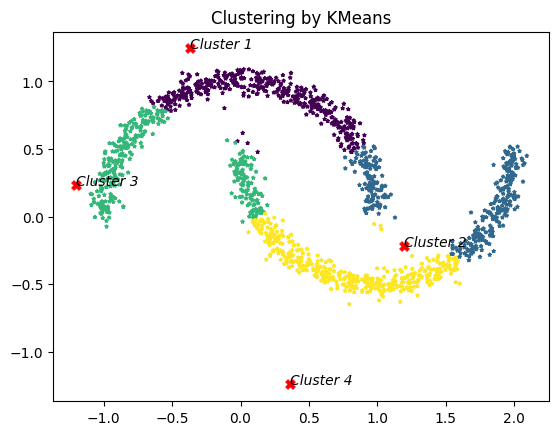

In [9]:
perform_clustering(df_2, 4)       # KMeans clustering result for dataset B

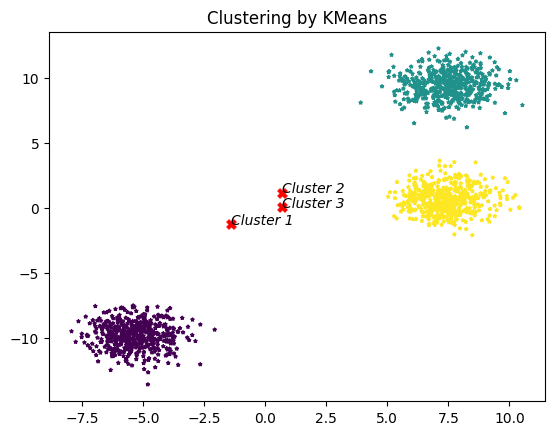

In [10]:
perform_clustering(df_3, 3)     # KMeans clustering result for dataset C

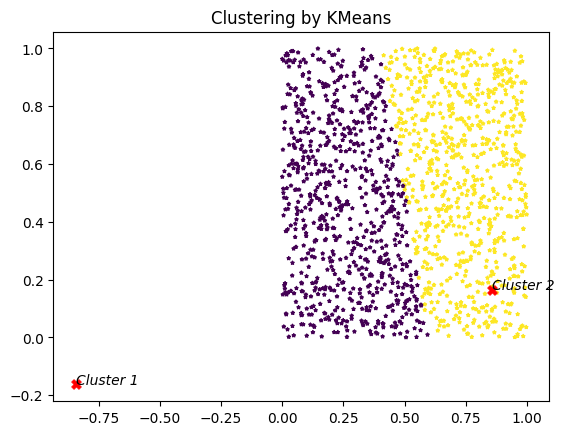

In [11]:
perform_clustering(df_4, 2)      # KMeans clustering result for dataset D

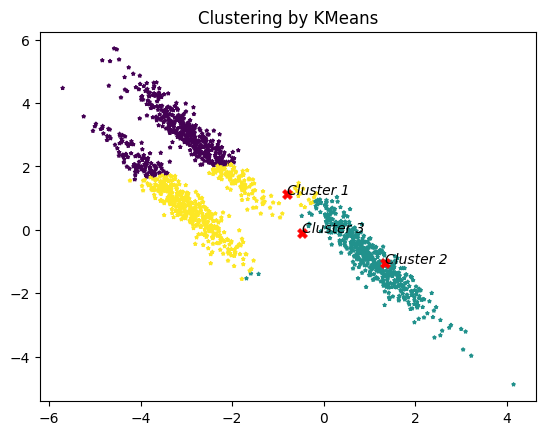

In [12]:
perform_clustering(df_5, 3)   # KMeans clustering result for dataset E

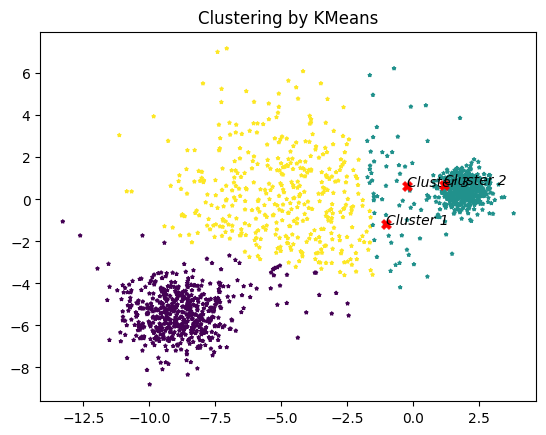

In [13]:
perform_clustering(df_6, 3)     # KMeans clustering result for dataset F

In [14]:
# function creation to store inertias for elbow plot

def perform_kmeans(data, num_k, sil_name):
    means = []
    inertias = []
    scores = []
    
    for k in range(1, num_k+1):
      kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, random_state=random_state)
      kmeans.fit(data)
      if k>=2:    
          sc = silhouette_score(data[['ct1', 'ct2']], kmeans.labels_)
      else:
        sc = 0
      means.append(k)
      inertias.append(kmeans.inertia_)
      scores.append(sc)
    
    
    return means, inertias, scores

In [15]:
knums = []
inertias = []
name = ['A', 'B', 'C', 'D', 'E', 'F']
silhouette_scoress = pd.DataFrame()
for i in range(1,7):
  df = globals()[f'df_{i}']
  name = ['A', 'B', 'C', 'D', 'E', 'F']
  knum, inertia, sil_scores = perform_kmeans(df[['ct1', 'ct2']],10, name[i-1] )
  knums.append(knum)
  inertias.append(inertia)
  silhouette_scoress[name[i-1]] = sil_scores

In [16]:
silhouette_scoress


,A,B,C,D,E,F
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.353494,0.497706,0.804528,0.351933,0.616338,0.625769
2,0.389325,0.452624,0.810432,0.389524,0.510105,0.626163
3,0.378858,0.444298,0.675377,0.399230,0.461071,0.623249
4,0.356536,0.475796,0.529318,0.383419,0.428642,0.614957
5,0.338037,0.504081,0.347994,0.373930,0.469746,0.504878
6,0.312876,0.501090,0.349871,0.367600,0.462358,0.503880
7,0.350604,0.505173,0.343042,0.369577,0.459883,0.496021
8,0.390855,0.511386,0.331545,0.367686,0.459546,0.490350
9,0.430290,0.514375,0.342840,0.361313,0.466696,0.494899


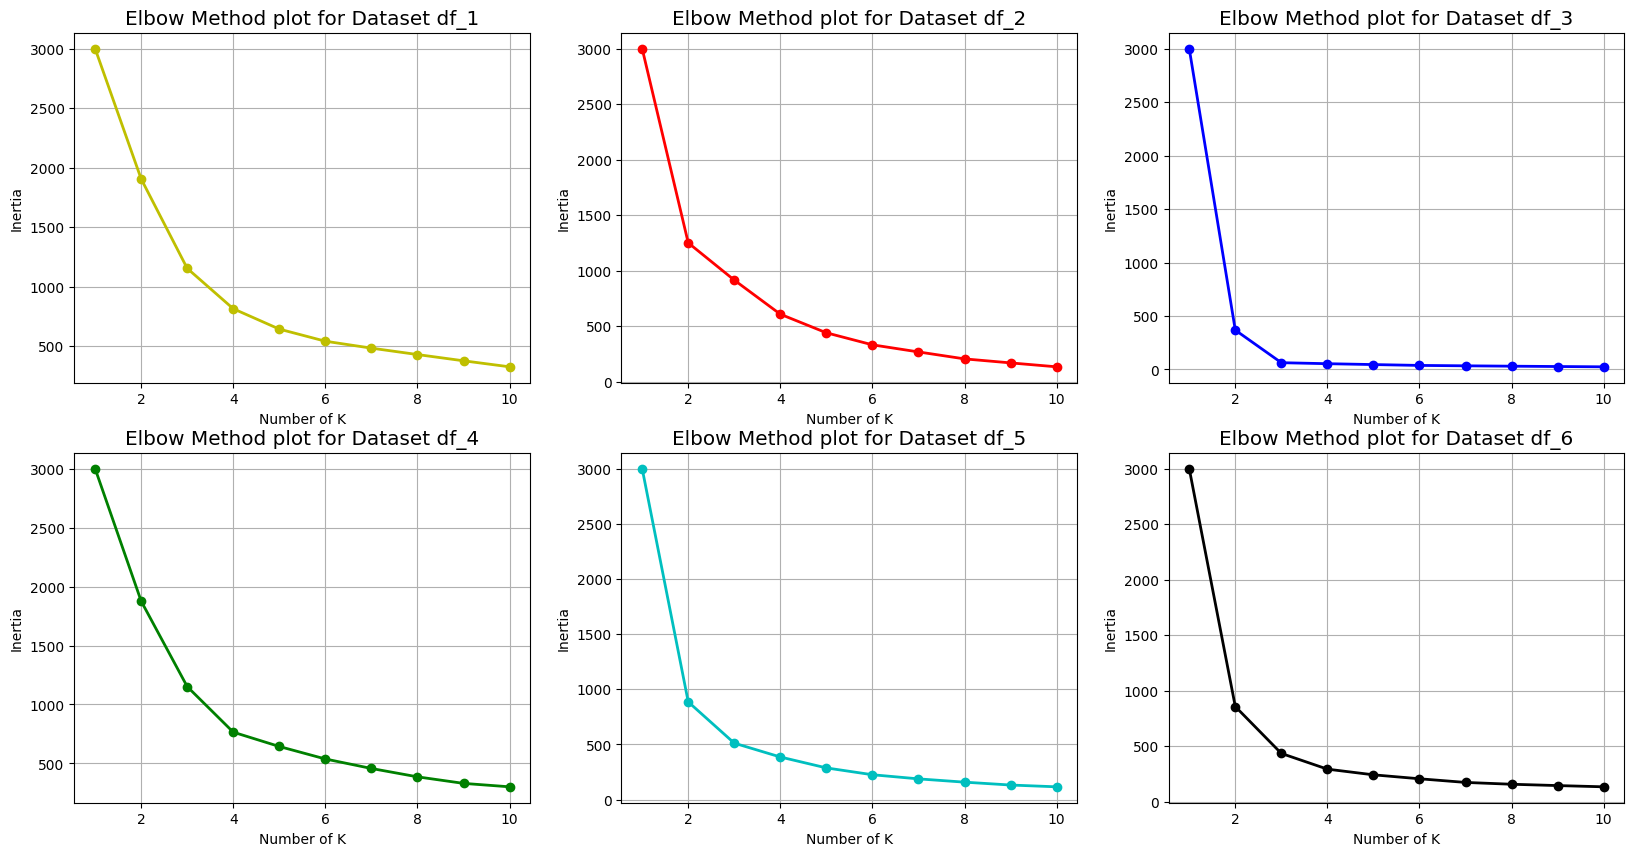

In [17]:
# function to draw elbow plot

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10))
style.use('bmh')
for i, ax in enumerate(fig.axes, start=0):
    ax.plot(knums[i], inertias[i], 'o-' , c = color[i-1])
    #ax.xlabel('Number of Clusters')
   # ax.ylabel('Inertia')
    ax.grid(True)
    ax.set_title(f'Elbow Method plot for Dataset df_{i+1}')
    ax.set_xlabel('Number of K')
    ax.set_ylabel('Inertia')


# **2.4 Learning the best value of k using elbow plot and yellowbrick**

---



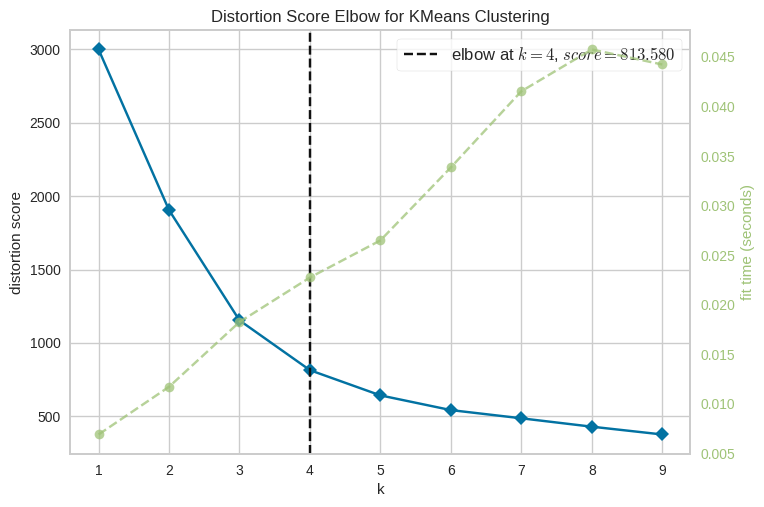

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# yellow brick visualiser
style.use('bmh')
from yellowbrick.cluster import KElbowVisualizer
model1 = KMeans(random_state=42, n_init = 10)
visualizer1 = KElbowVisualizer(model1, k=(1,10))
visualizer1.fit(df_1[['ct1', 'ct2']])
visualizer1.show()


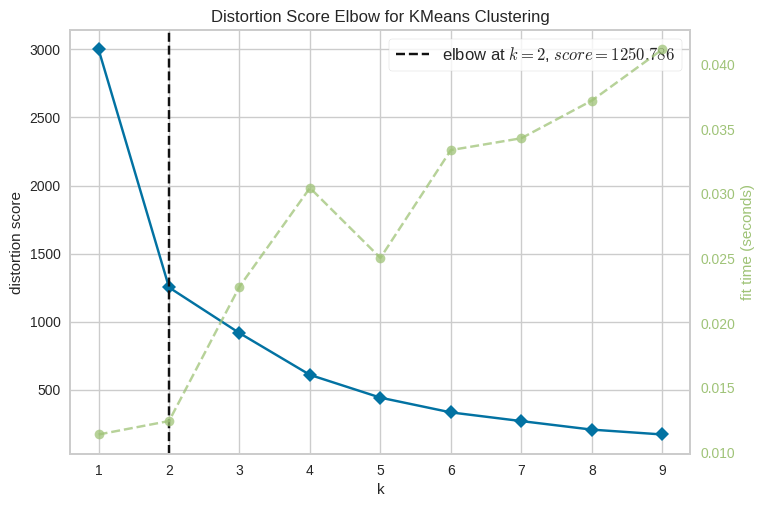

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:

visualizer2 = KElbowVisualizer(model1, k=(1,10))
visualizer2.fit(df_2[['ct1', 'ct2']])
visualizer2.show()

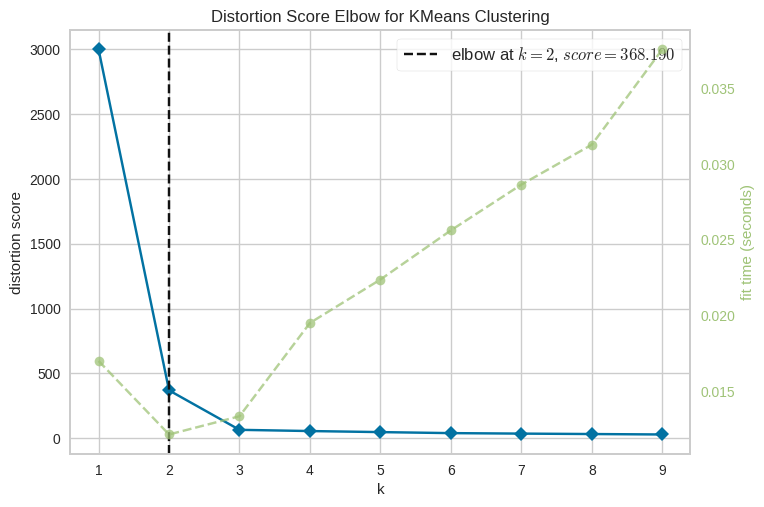

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
visualizer3 = KElbowVisualizer(model1, k=(1,10))
visualizer3.fit(df_3[['ct1', 'ct2']])
visualizer3.show()

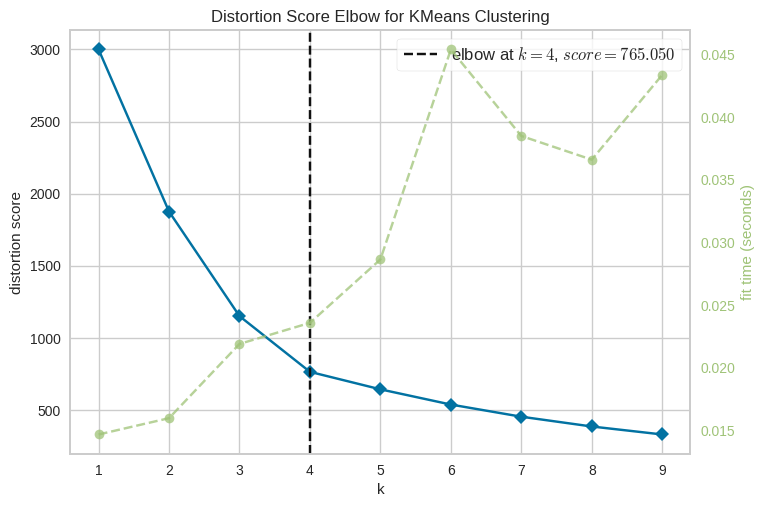

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
visualizer4 = KElbowVisualizer(model1, k=(1,10))
visualizer4.fit(df_4[['ct1', 'ct2']])
visualizer4.show()

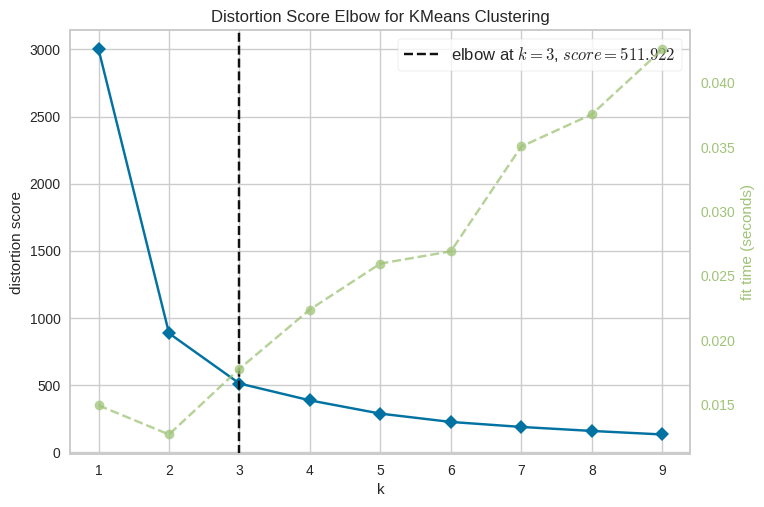

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
visualizer5 = KElbowVisualizer(model1, k=(1,10))
visualizer5.fit(df_5[['ct1', 'ct2']])
visualizer5.show()

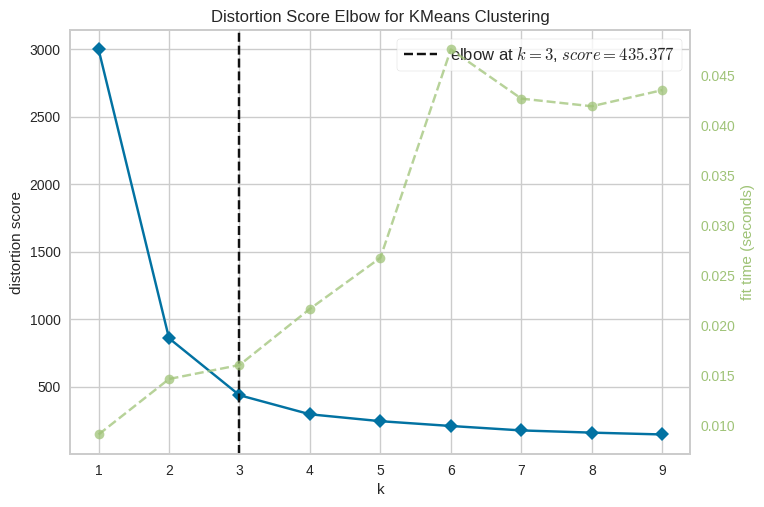

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
visualizer6 = KElbowVisualizer(model1, k=(1,10))
visualizer6.fit(df_6[['ct1', 'ct2']])
visualizer6.show()

## Exercise 3
Perform ```DBSCAN``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#dbscan
* 3.1 Plot all results

In [24]:
#function to plot results of DBSCAN clustering method
from sklearn.cluster import DBSCAN
def perform_dbscan(r, num_smpl, data):
    db = DBSCAN(eps=r, min_samples=num_smpl).fit(data[['ct1', 'ct2']])
    data['labels_db'] = db.labels_
    db_score = silhouette_score(data[['ct1', 'ct2']], db.labels_)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    n_noise_ = list(db.labels_).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    style.use('default')
    plt.scatter(x=data['c1'], y=data['c2'], c=data['labels_db'], s = 6, marker = '*')
    plt.title(f'Clustering Result by DBSCAN')
    plt.show()
    print(f'The sielhouette Score coefficient for DBSCAN on this dataset is {db_score}')

Estimated number of clusters: 2
Estimated number of noise points: 0


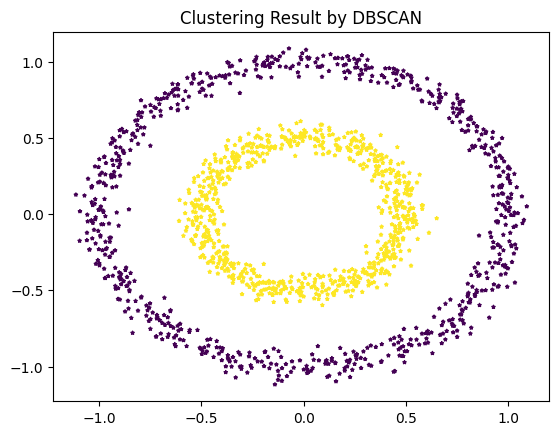

The sielhouette Score coefficient for DBSCAN on this dataset is 0.11455420406724966


In [25]:
perform_dbscan(0.3, 5, df_1)    # clustering by DBSCAN on dataset A

Estimated number of clusters: 2
Estimated number of noise points: 19


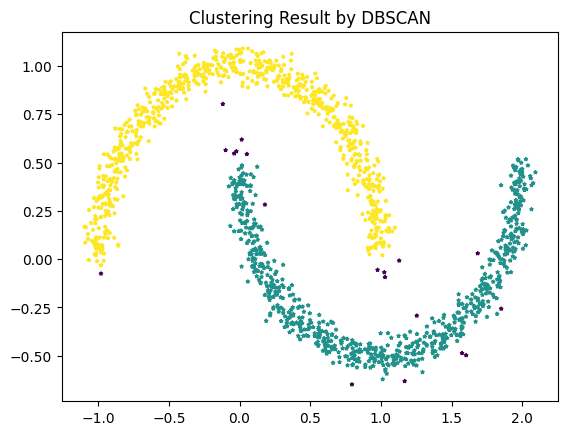

The sielhouette Score coefficient for DBSCAN on this dataset is 0.23162935268904664


In [26]:
perform_dbscan(0.1, 5, df_2)    # clustering by DBSCAN on dataset B

Estimated number of clusters: 3
Estimated number of noise points: 11


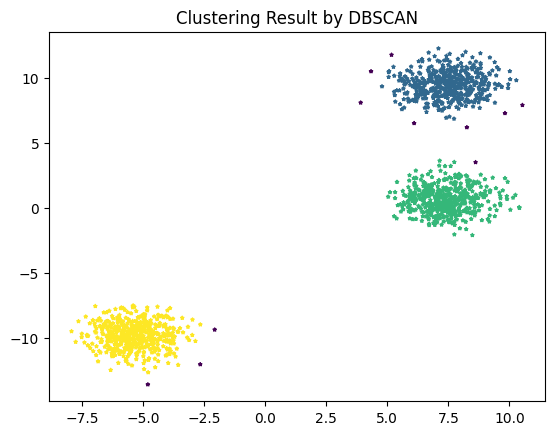

The sielhouette Score coefficient for DBSCAN on this dataset is 0.8012256767542554


In [27]:
perform_dbscan(0.1, 4, df_3)

Estimated number of clusters: 1
Estimated number of noise points: 2


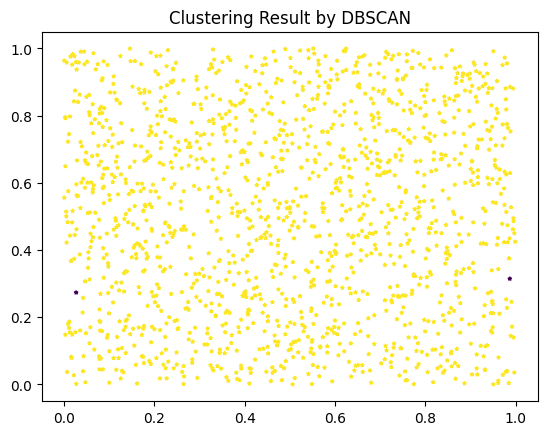

The sielhouette Score coefficient for DBSCAN on this dataset is 0.13741990136308221


In [28]:
perform_dbscan(0.17, 6, df_4)

Estimated number of clusters: 3
Estimated number of noise points: 30


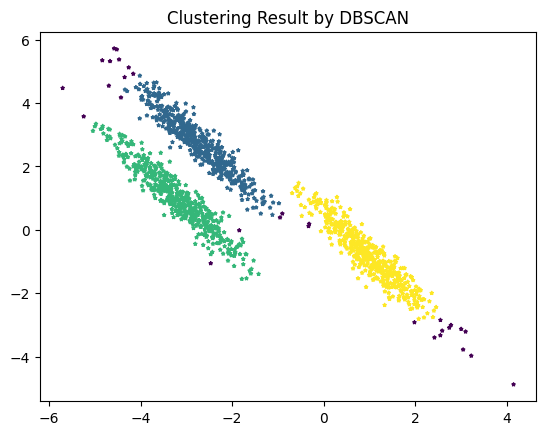

The sielhouette Score coefficient for DBSCAN on this dataset is 0.46079872606998407


In [29]:
perform_dbscan(0.15, 6, df_5)

Estimated number of clusters: 3
Estimated number of noise points: 75


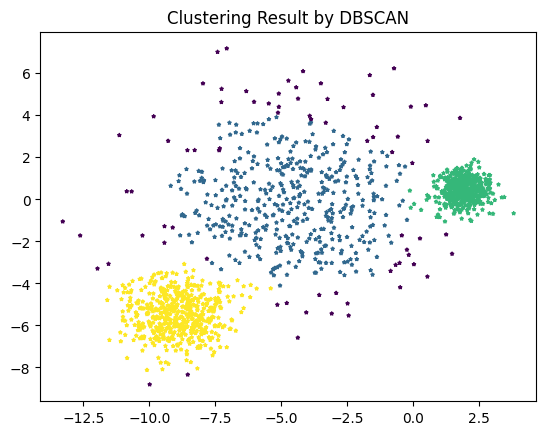

The sielhouette Score coefficient for DBSCAN on this dataset is 0.6024297841907087


In [30]:
perform_dbscan(0.2, 8, df_6)

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

# ***Comparision of both clustering methods for each dataset:***

Clustering Method: Silhouette Coefficient found by appling KMeans algorithm is shown below for each data. I have only considerrred sihouette score of model suggested by elowbow methods. I have also calculated silhouette score for 1 to 10 k for all data set and stored those value in {silhouette_scoress} dataFrame. you can just type this data frame to check all scores.


In [31]:
silhouette_scoress


,A,B,C,D,E,F
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.353494,0.497706,0.804528,0.351933,0.616338,0.625769
2,0.389325,0.452624,0.810432,0.389524,0.510105,0.626163
3,0.378858,0.444298,0.675377,0.399230,0.461071,0.623249
4,0.356536,0.475796,0.529318,0.383419,0.428642,0.614957
5,0.338037,0.504081,0.347994,0.373930,0.469746,0.504878
6,0.312876,0.501090,0.349871,0.367600,0.462358,0.503880
7,0.350604,0.505173,0.343042,0.369577,0.459883,0.496021
8,0.390855,0.511386,0.331545,0.367686,0.459546,0.490350
9,0.430290,0.514375,0.342840,0.361313,0.466696,0.494899


## ***According to elbow Method for KMeans***

*   For DATASET A: Silhouette Score = 0.37 and Number of clusters are 4
---
*   For DATASET B: Silhouette Score = 0.49 and Number of clusters are 2
---
*   For DATASET C: Silhouette Score = 0.80 and Number of clusters are 2
---
*   For DATASET D: Silhouette Score = 0.39 and Number of clusters are 4
---
*   For DATASET E: Silhouette Score = 0.51 and Number of clusters are 3
---
*   For DATASET F: Silhouette Score = 0.62 and Number of clusters are 3



## ***According to DBSCAN method:***


*   For DATASET A: Silhouette coefficient = 0.1128 and Number of Clusters = 2 havig 0 outliers(Noise points).

---


*   For DATASET B: Silhouette coefficient = 0.278 and Number of Clusters = 2 havig 14 outliers(Noise points).

---

*   For DATASET C: Silhouette coefficient = 0.801 and Number of Clusters = 3 havig 11 outliers(Noise points).

---


*   For DATASET D: Silhouette coefficient = 0.103 and Number of Clusters = 1 havig 2 outliers(Noise points).

---


*   For DATASET E: Silhouette coefficient = 0.46 and Number of Clusters = 3 havig 30 outliers(Noise points).



---



*   For DATASET F: Silhouette coefficient = 0.602 and Number of Clusters = 3 havig 75 outliers(Noise points).









## Optional Task
Perform ```SpectralClustering``` clustering on all data sets:https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
* Plot the results

In [32]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

In [79]:
def perform_spectral_clustering(data, num_cluster) :   
    model_spe = SpectralClustering(n_clusters=num_cluster, assign_labels='discretize', random_state=42)
    model_spe.fit(data[['ct1','ct2']])
    data['label_spe'] = model_spe.labels_
    plt.scatter(x=data['c1'], y=data['c2'], c=data['label_spe'], s = 6, marker = '*')
    plt.title(f'Clustering Result by Spectral Clustering Method')
    plt.show()

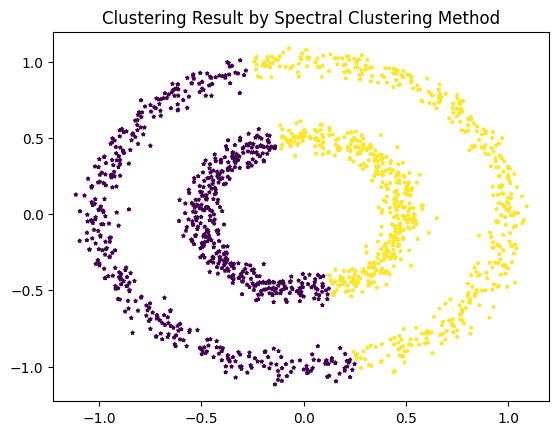

In [80]:
perform_spectral_clustering(df_1, 2)

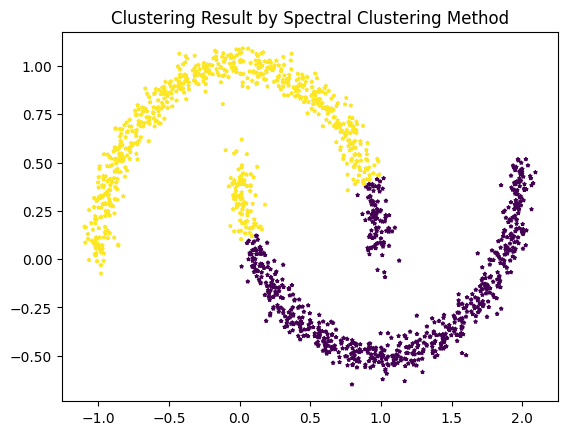

In [81]:
perform_spectral_clustering(df_2, 2)

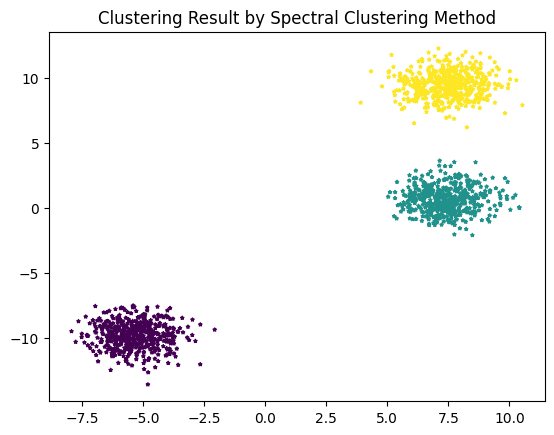

In [82]:
perform_spectral_clustering(df_3, 3)

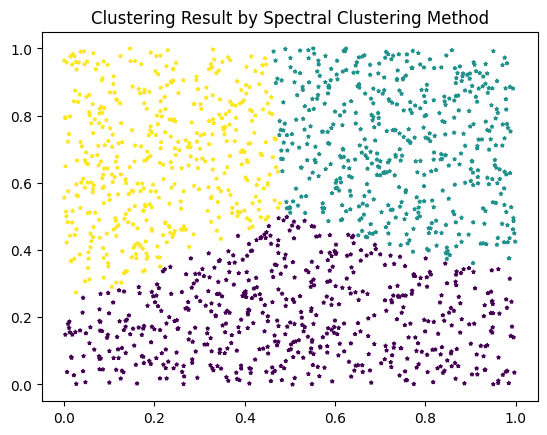

In [83]:
perform_spectral_clustering(df_4, 3)

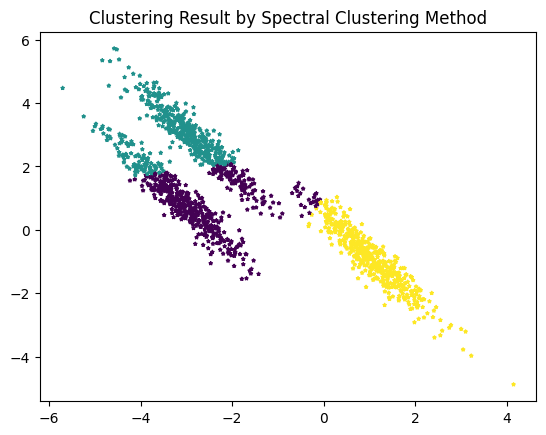

In [84]:
perform_spectral_clustering(df_5, 3)

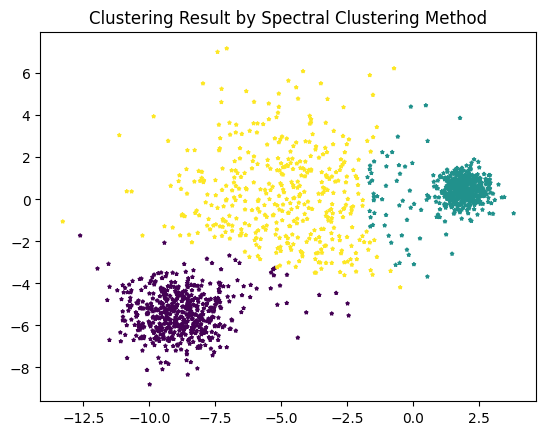

In [85]:
perform_spectral_clustering(df_6, 3)